---
# 
---

In this notebook, 


**Source :**
https://fr.wikipedia.org/wiki/Montr%C3%A9al

https://www.economie.gouv.qc.ca/pages-regionales/montreal/portrait-regional/demographie#:~:text=Population%20de%20Montr%C3%A9al%20(2023)%20%3A%202%20124%20865%20habitants


Source : Institut de la statistique du Québec.
          2021-2026	  2026-2031	  2031-2036	  2036-2041
Montréal	5,2 %    	-2,1 %	    -0,1 %	    0,0 %

2026    2121100
2031    2077000
2026    2075600
2041    2076700
2046    2079700
2051    2084400

Prediction for the province population in 2071

Weak Scenario : population 2051 -4%
Moderate Scenario : population 2051 +6.5%
High Scenario : population 2051 +15%

Keeping population for 2099 same as 2071, but apply a polynomial of second degree interpolation to get a smooth curve.

### Importing necessary libraries

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Define files and variables

In [2]:
data_dir = '../data/Population//'

obs_fcst_file = 'Montreal.txt' # Spaces separated

out_dir = '../data/Population/processed/'

start_fcst = 2021
end_year_fcst = 2099

end_fcst_yul = 2051

file_out = 'Montreal.csv'

### Read data files

In [3]:
pop = pd.read_csv(os.path.join(data_dir, obs_fcst_file), sep='\s+')
pop

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_540211/129417253.py:1: SyntaxWarning: invalid escape sequence '\s'
  pop = pd.read_csv(os.path.join(data_dir, obs_fcst_file), sep='\s+')


,Year,Population
0,1801,9000
1,1811,13300
2,1821,18767
3,1831,27297
4,1841,40356
5,1851,57715
6,1861,90323
7,1871,130022
8,1881,176263
9,1891,254278


### Plot the data

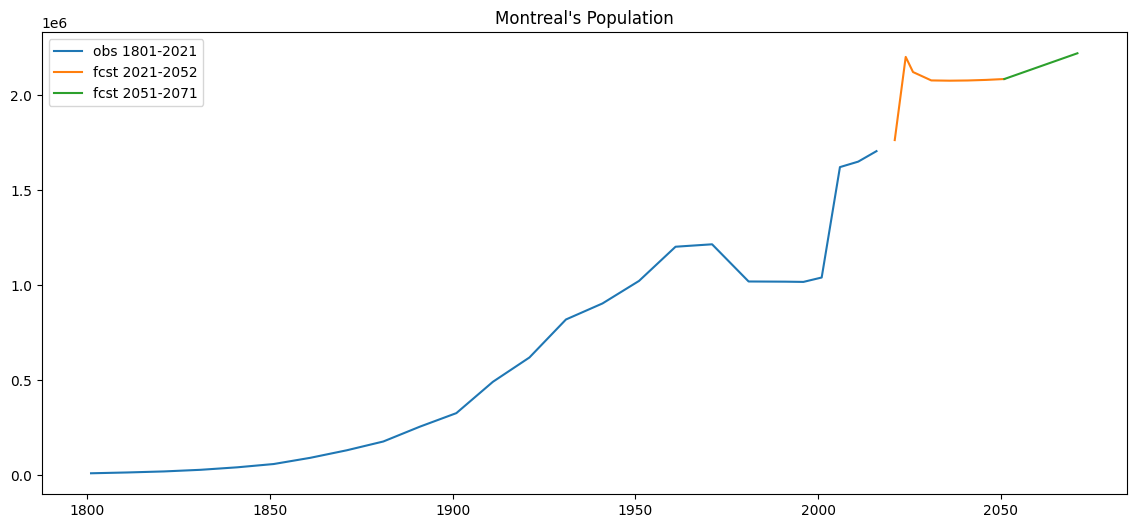

In [4]:
fig = plt.figure(figsize=(14,6))

ax = plt.plot(pop[pop['Year'] < start_fcst]['Year'], pop[pop['Year'] < start_fcst]['Population'], label='obs 1801-2021')
ax = plt.plot(pop[(pop['Year'] >= start_fcst) & (pop['Year'] <= end_fcst_yul)]['Year'], pop[(pop['Year'] >= start_fcst) & (pop['Year'] <= end_fcst_yul)]['Population'], label='fcst 2021-2052')
ax = plt.plot(pop[pop['Year'] >= end_fcst_yul]['Year'], pop[pop['Year'] >= end_fcst_yul]['Population'], label='fcst 2051-2071')

plt.title("Montreal's Population")

plt.legend()

plt.show()

### Increase the population dataframe frequency to yearly and interpolate data

In [5]:
#fcst_weak = pd.concat([ obs_1984_2023.iloc[-1:], fcst_weak[fcst_weak.index >= pd.to_datetime(start_year_fcst, format='%Y')]])
pop['Year'] = pd.to_datetime(pop['Year'], format="%Y")
pop.set_index('Year', inplace=True)

pop = pop.resample('YS').interpolate(method='polynomial', order=2)
pop

,Population
Year,
1801-01-01,9.000000e+03
1802-01-01,9.389547e+03
1803-01-01,9.788026e+03
1804-01-01,1.019544e+04
1805-01-01,1.061293e+04
...,...
2067-01-01,2.177072e+06
2068-01-01,2.187032e+06
2069-01-01,2.197511e+06


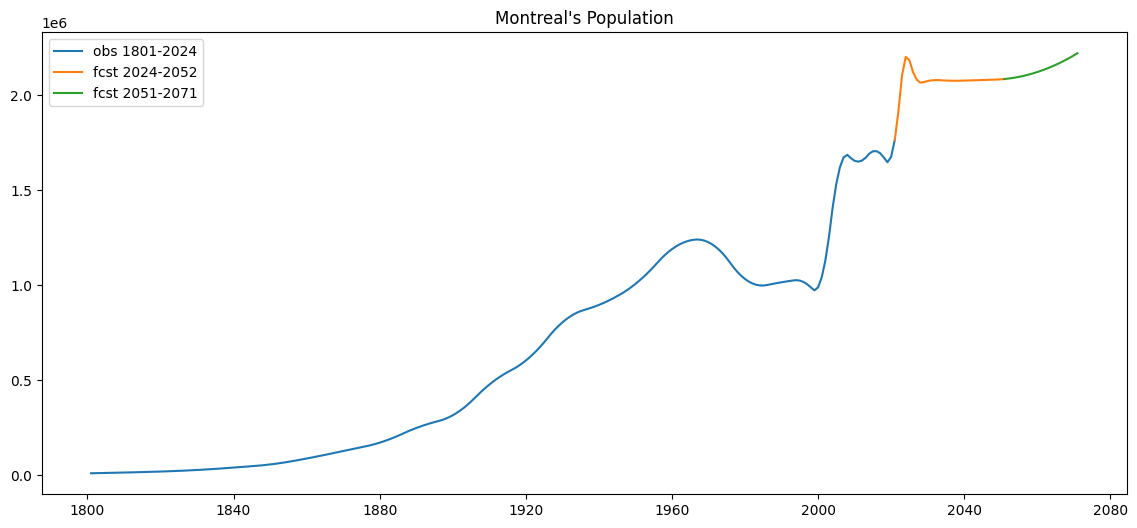

In [6]:
fig = plt.figure(figsize=(14,6))

ax = plt.plot(pop[pop.index <= pd.to_datetime(start_fcst, format="%Y")].index, pop[pop.index <= pd.to_datetime(start_fcst, format="%Y")]['Population'], label='obs 1801-2024')
ax = plt.plot(pop[(pop.index >= pd.to_datetime(start_fcst, format="%Y")) & (pop.index <= pd.to_datetime(end_fcst_yul, format="%Y"))].index, pop[(pop.index >= pd.to_datetime(start_fcst, format="%Y")) & (pop.index <= pd.to_datetime(end_fcst_yul, format="%Y"))]['Population'], label='fcst 2024-2052')
ax = plt.plot(pop[pop.index >= pd.to_datetime(end_fcst_yul, format="%Y")].index, pop[pop.index >= pd.to_datetime(end_fcst_yul, format="%Y")]['Population'], label='fcst 2051-2071')

plt.title("Montreal's Population")

plt.legend()

plt.show()

### Interpolation the population up to 2099

In [7]:
new_range = pd.date_range(start=pop.index.min(), end =  pd.to_datetime(end_year_fcst, format="%Y"), freq="YS")
pop = pop.reindex(new_range)

In [8]:
pop.iloc[-1] = pop[pop.index == pd.to_datetime(2071, format="%Y")]
pop

,Population
1801-01-01,9.000000e+03
1802-01-01,9.389547e+03
1803-01-01,9.788026e+03
1804-01-01,1.019544e+04
1805-01-01,1.061293e+04
...,...
2095-01-01,NaN
2096-01-01,NaN
2097-01-01,NaN
2098-01-01,NaN


In [9]:
pop = pop.resample('YS').interpolate(method='polynomial', order=2)
pop

,Population
1801-01-01,9.000000e+03
1802-01-01,9.389547e+03
1803-01-01,9.788026e+03
1804-01-01,1.019544e+04
1805-01-01,1.061293e+04
...,...
2095-01-01,2.258385e+06
2096-01-01,2.249969e+06
2097-01-01,2.240726e+06
2098-01-01,2.230707e+06


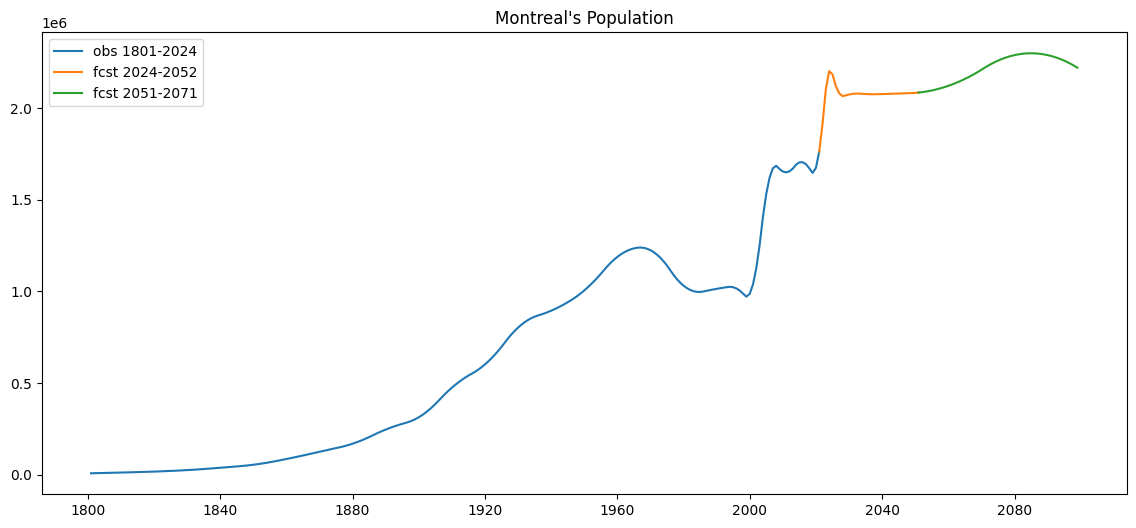

In [10]:
fig = plt.figure(figsize=(14,6))

ax = plt.plot(pop[pop.index <= pd.to_datetime(start_fcst, format="%Y")].index, pop[pop.index <= pd.to_datetime(start_fcst, format="%Y")]['Population'], label='obs 1801-2024')
ax = plt.plot(pop[(pop.index >= pd.to_datetime(start_fcst, format="%Y")) & (pop.index <= pd.to_datetime(end_fcst_yul, format="%Y"))].index, pop[(pop.index >= pd.to_datetime(start_fcst, format="%Y")) & (pop.index <= pd.to_datetime(end_fcst_yul, format="%Y"))]['Population'], label='fcst 2024-2052')
ax = plt.plot(pop[pop.index >= pd.to_datetime(end_fcst_yul, format="%Y")].index, pop[pop.index >= pd.to_datetime(end_fcst_yul, format="%Y")]['Population'], label='fcst 2051-2071')

plt.title("Montreal's Population")

plt.legend()

plt.show()

### Write data to file

In [11]:
pop.to_csv(os.path.join(out_dir, file_out))